In [88]:
# zomato data set for the year 2020. The data set contains information about restaurants, including their names, cuisines

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
import plotly as py

In [90]:
zomato_data=pd.read_csv("C:/Users/dahal/Downloads/zomato_data.csv")

In [91]:
zomato_data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [92]:
def handleRate(value):
    value =str(value).split('/')
    value=value[0];
    return float(value)

In [93]:
zomato_data['rate']=zomato_data['rate'].apply(handleRate)

In [94]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [95]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [96]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [97]:
most_common_type = zomato_data['listed_in(type)'].value_counts().idxmax()


In [98]:
zomato_data['book_table'] = zomato_data['book_table'].str.strip().str.lower()

In [99]:
zomato_data['online_order'] = zomato_data['online_order'].str.strip().str.lower()

In [100]:
most_common_type = zomato_data['listed_in(type)'].value_counts().idxmax()

In [101]:
votes_by_type = zomato_data.groupby('listed_in(type)')['votes'].sum()

In [102]:
most_common_rating = zomato_data['rate'].mode()[0]

In [103]:
average_spending = zomato_data['approx_cost(for two people)'].mean()

In [104]:
mode_ratings = zomato_data.groupby('online_order')['rate'].mean()

In [105]:
offline_orders = zomato_data[zomato_data['online_order'] == 'no']
offline_type_counts = offline_orders['listed_in(type)'].value_counts()

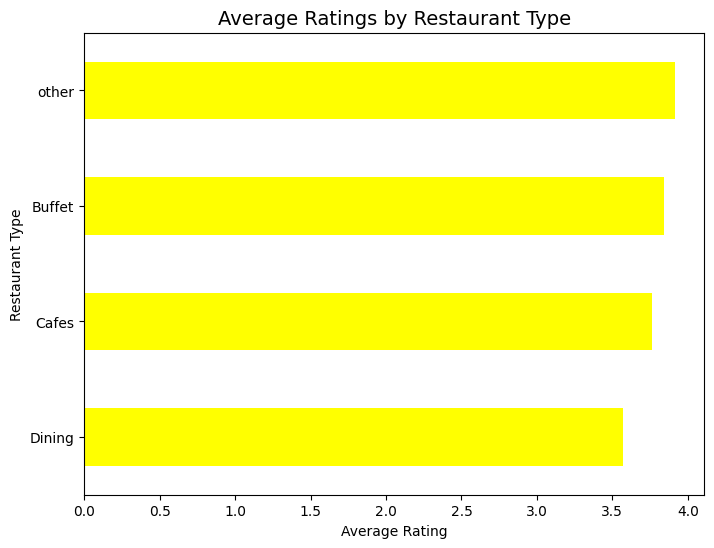

In [106]:
avg_rating = zomato_data.groupby('listed_in(type)')['rate'].mean().sort_values()
plt.figure(figsize=(8, 6))
avg_rating.plot(kind='barh', color='yellow')
plt.title("Average Ratings by Restaurant Type", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Type")
plt.show()

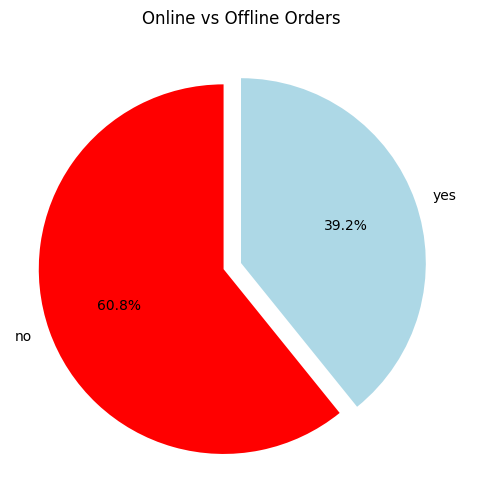

In [107]:
order_counts = zomato_data['online_order'].value_counts()
plt.figure(figsize=(6, 6))
order_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'lightblue'], startangle=90, explode=(0.1, 0))
plt.title("Online vs Offline Orders")
plt.ylabel("")
plt.show()

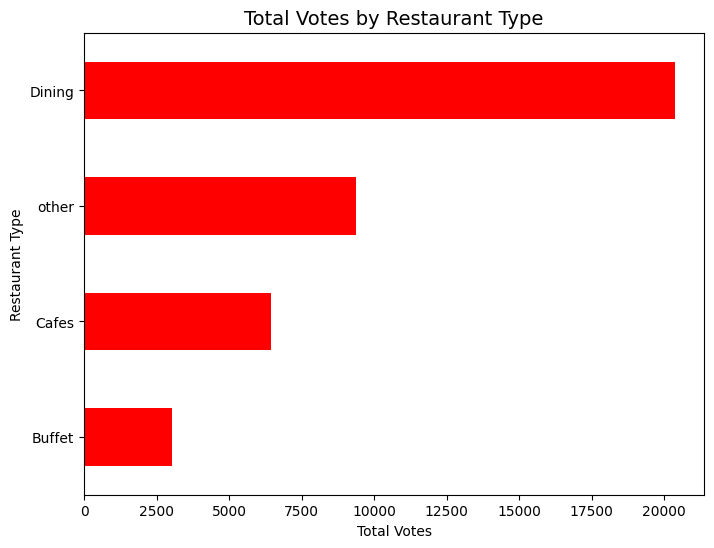

In [108]:
votes_by_type = zomato_data.groupby('listed_in(type)')['votes'].sum()
plt.figure(figsize=(8, 6))
votes_by_type.sort_values().plot(kind='barh', color='red')
plt.title("Total Votes by Restaurant Type", fontsize=14)
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Type")
plt.show()

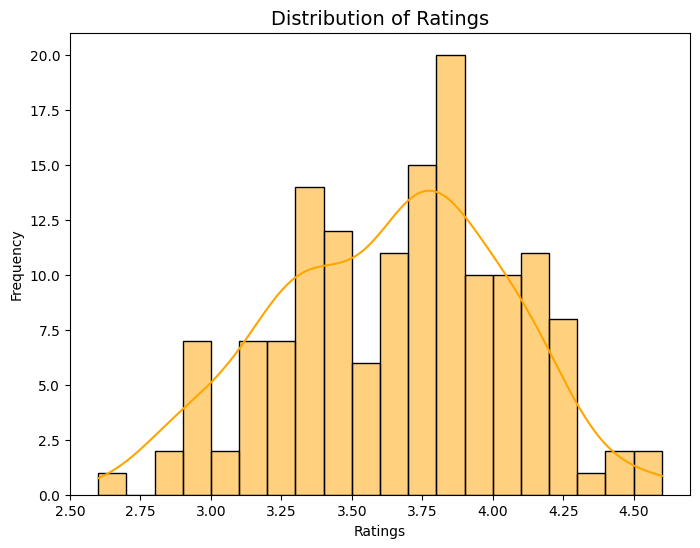

In [109]:
plt.figure(figsize=(8, 6))
sns.histplot(zomato_data['rate'], kde=True, color='orange', bins=20)
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

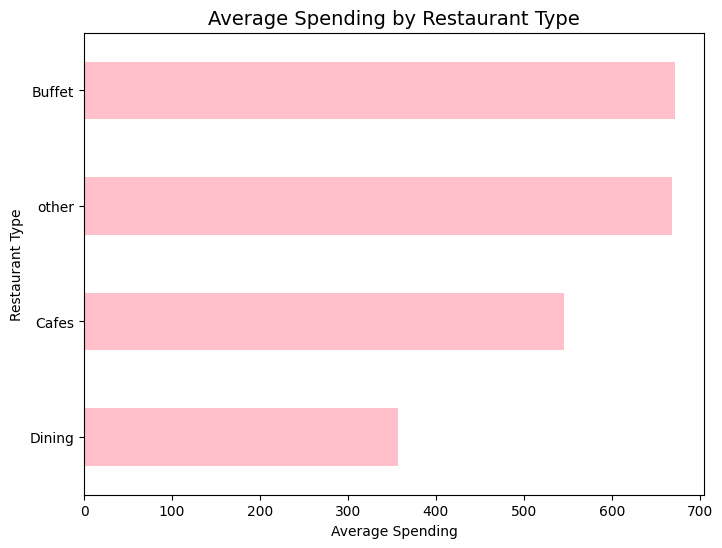

In [110]:
if 'approx_cost(for two people)' in zomato_data.columns:
    zomato_data['approx_cost(for two people)'] = zomato_data['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)
    avg_spending = zomato_data.groupby('listed_in(type)')['approx_cost(for two people)'].mean()
    plt.figure(figsize=(8, 6))
    avg_spending.sort_values().plot(kind='barh', color='pink')
    plt.title("Average Spending by Restaurant Type", fontsize=14)
    plt.xlabel("Average Spending")
    plt.ylabel("Restaurant Type")
    plt.show()

In [111]:
# Suggestions for IT Companies
# Data-Driven Decision-Making Tools:

# Build dashboards using tools like Power BI, Tableau, or custom Python applications to provide real-time insights into customer behavior, popular restaurant types, and online/offline ordering trends.
# Customer Segmentation and Targeting:

# Use machine learning to classify customers based on their spending patterns, preferred restaurant types, and ordering modes. This helps in better marketing strategies.
# Partnership with Restaurants:

# Identify high-demand restaurant types (e.g., cafes, quick-service restaurants) and propose loyalty programs, dynamic pricing algorithms, or data analytics solutions.
# Order Prediction Model:

# Develop a model to predict peak ordering times based on past data (e.g., weekends, dinner hours) and suggest optimal staffing, discounts, or delivery resources.
# Optimize Delivery Logistics:

# Leverage the data to create tools for route optimization, reducing delivery times for popular orders in specific locations.
# Personalized Recommendations:

# Build a recommendation system using collaborative filtering or content-based methods to suggest restaurants or dishes based on previous orders.

In [112]:
# Predictions for Zomato company
# 1. Top Revenue-Generating Restaurant Types
# Prediction: Restaurants offering fast food, North Indian, and Chinese cuisine might dominate online orders due to quick preparation and high demand.
# Actionable Step: Focus marketing efforts or AI solutions on these categories.

# 2. Online Orders Will Outperform Offline
# As digital transformation accelerates, online orders will continue to grow, especially among younger, tech-savvy consumers.
# Actionable Step: Develop AI/ML-driven customer engagement tools (chatbots, personalized offers) to enhance the online experience.

# 3. Peak Ordering Days and Times
# Prediction: Weekends (Friday–Sunday) and dinner hours (7–9 PM) will consistently show the highest order volumes.
# Actionable Step: Develop dynamic pricing algorithms and predictive models to optimize restaurant operations during these peak times.

# 4. Average Spending Trends
# Higher spending is likely observed in specific categories like fine dining or couples' orders compared to fast food.
# Actionable Step: Offer tailored discounts for couples or high-spending categories to increase loyalty.

# 5. Offline Restaurant Segments
# Prediction: Fine dining and luxury restaurants might receive more offline orders since people prefer the in-person experience for such dining.
# Actionable Step: Propose solutions like reservation management systems or customer feedback tools for these restaurant types.

# 6. Emerging Locations for Orders
# Urban areas and rapidly developing suburbs will continue to dominate food delivery demand.

In [113]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,yes,yes,4.1,775,800.0,Buffet
1,Spice Elephant,yes,no,4.1,787,800.0,Buffet
2,San Churro Cafe,yes,no,3.8,918,800.0,Buffet
3,Addhuri Udupi Bhojana,no,no,3.7,88,300.0,Buffet
4,Grand Village,no,no,3.8,166,600.0,Buffet


In [114]:
from sklearn.ensemble import RandomForestRegressor


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [116]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,yes,yes,4.1,775,800.0,Buffet
1,Spice Elephant,yes,no,4.1,787,800.0,Buffet
2,San Churro Cafe,yes,no,3.8,918,800.0,Buffet
3,Addhuri Udupi Bhojana,no,no,3.7,88,300.0,Buffet
4,Grand Village,no,no,3.8,166,600.0,Buffet


In [117]:
X = zomato_data[['votes', 'approx_cost(for two people)']]
y = zomato_data['rate']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Squared Error: 0.16678985837270316


In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering
X = zomato_data[['votes', 'approx_cost(for two people)']]
y = zomato_data['rate']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 0.1645229160285876


In [125]:
import numpy as np

In [128]:
import implicit
from scipy.sparse import csr_matrix

# Example user-item data
data = csr_matrix([
    [5, 0, 3],
    [4, 0, 0],
    [1, 1, 0],
    [0, 0, 4],
])

# Train collaborative filtering model
model = implicit.als.AlternatingLeastSquares(factors=10, iterations=50)
model.fit(data.T)

# Recommend items for a user
user_id = 0
recommendations = model.recommend(user_id, data[user_id], N=5)
print("Recommendations:", recommendations)


c:\Users\dahal\AppData\Local\Programs\Python\Python312\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0 seconds
  warnings.warn(
100%|██████████| 50/50 [00:00<?, ?it/s]

Recommendations: (array([1, 3, 2, 0, 0], dtype=int32), array([ 9.9960494e-01,  9.1594458e-04, -3.4028235e+38, -3.4028235e+38,
        0.0000000e+00], dtype=float32))
